# Basic look at smoothed category target encoders  

In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('https://github.com/appraisers-bff/Data-Science/raw/master/losangeles.csv')

## Exploration

In [5]:
df.sample(5).T

,95,745,50,857,72
ZIPcode,91505-3254,91505-2954,,91505-2944,
TaxRateArea_CITY,BURBANK,BURBANK,LOS ANGELES,BURBANK,LOS ANGELES
AIN,2479013020,2480017034,2560038012,2480021023,2563004026
RollYear,2016,2016,2016,2016,2016
TaxRateArea,2530,2530,13,2530,13
AssessorID,2479-013-020,2480-017-034,2560-038-012,2480-021-023,2563-004-026
PropertyLocation,605 N NIAGARA ST BURBANK CA 91505,"750 N WHITNALL HWY, UNIT 6 BURBANK CA 91505",NaN,638 N LIMA ST BURBANK CA 91505,NaN
PropertyType,R-I,CND,VAC,SFR,VAC
PropertyUseCode,0200,010C,010V,0100,010V
GeneralUseType,Residential,Residential,Residential,Residential,Residential


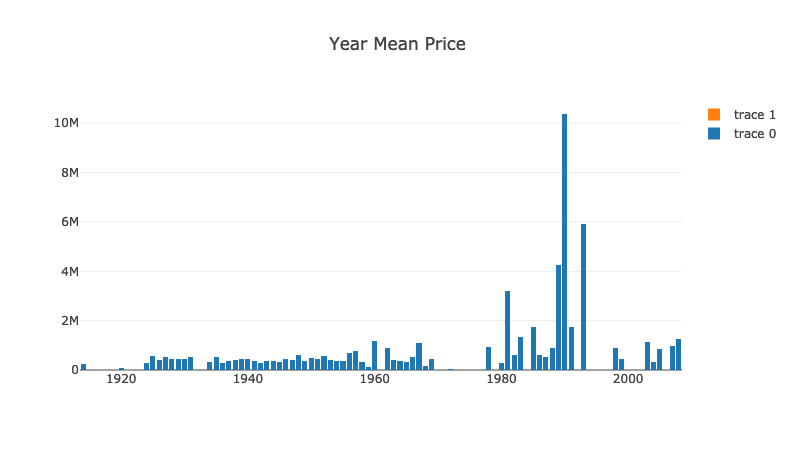

In [41]:
df = df[df['YearBuilt'] != 0]
data = [go.Bar(x=df.groupby('YearBuilt').mean().index, 
               y=df.groupby('YearBuilt').mean()['TotalValue'], orientation='v'),go.Bar(x=df.groupby('YearBuilt').count().index, 
               y=df.groupby('YearBuilt').count()['TotalValue'], orientation='v')]

layout= go.Layout(title='Year Mean Price', barmode='stack')

fig = go.Figure(layout=layout, data=data)

pyo.iplot(fig)

# Basic Mean Encoder

In [30]:
year_encoder = df.groupby('YearBuilt').mean()['TotalValue'].to_dict()

In [32]:
print(year_encoder[x])
print(year_encoder[x]*3)

1125801.0
3377403.0


In [29]:
ttest[1914]

239478.0

# Mean Encoder with Smoothing

In [38]:
# group your category and get both a mean and a count 
zips = df.groupby('ZIPcode')['TotalValue'].agg(['mean','count'])

# get the average for your target 
zip_mean = df['TotalValue'].mean()

# alpha value is kind of arbitrary
alpha = 100

# create a new column on your groupby dataframe with smoothing function
zips['label_encoding'] = ((zips['mean']*zips['count'])+(zip_mean*alpha))/(zips['count']+alpha)

# turn that dataframe column into a dictionary
zip_encoder = zips['label_encoding'].to_dict()

In [40]:
zip_encoder['91505-3254']

434209.21057692304